In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/heart_2022_no_nans.csv')

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Changing yes and no (and other variations) to be numerical 
df =  df[df.columns].replace({'Yes':1, 'No':0,'No, pre-diabetes or borderline diabetes':0,'Yes, but only during pregnancy (female)':1, '0': 0, '1':1 })

# Combining the Heart Attack and Angina columns since both of them are heart diseases
df['HeartDisease'] = df['HadHeartAttack'] | df['HadAngina']

# Dropping the old fields 
df.drop(columns = ['HadHeartAttack', 'HadAngina'], inplace = True)

In [5]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,71.67,27.99,0,0,1,1,"Yes, received Tdap",0,0,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,...,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,...,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,1,0
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,...,79.38,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,0,0


In [6]:
# Pulling out all numerical columns
num_df = df.select_dtypes(include = ['float64', 'int64'])
num_df.head()

,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,HeartDisease
0,4.0,0.0,1,9.0,0,0,0,0,0,0,...,0,1.60,71.67,27.99,0,0,1,1,0,0
1,0.0,0.0,1,6.0,0,0,0,0,0,0,...,0,1.78,95.25,30.13,0,0,1,1,0,0
2,0.0,0.0,0,8.0,0,0,0,0,0,0,...,1,1.85,108.86,31.66,1,0,0,1,0,0
3,5.0,0.0,1,9.0,0,0,1,0,1,0,...,0,1.70,90.72,31.32,0,0,1,1,0,0
4,3.0,15.0,1,5.0,0,0,0,0,0,0,...,0,1.55,79.38,33.07,0,0,1,1,0,0


In [7]:
num_df.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear',
       'HeartDisease'],
      dtype='object')

In [8]:
# Pulling out all categorical columns
cat_df = df.drop(columns=num_df.columns)
cat_df.head()

,State,Sex,GeneralHealth,LastCheckupTime,RemovedTeeth,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap,CovidPos
0,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,None of them,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,"Yes, received Tdap",0
1,Alabama,Male,Very good,Within past year (anytime less than 12 months ...,None of them,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 70 to 74,"Yes, received tetanus shot but not sure what type",0
2,Alabama,Male,Very good,Within past year (anytime less than 12 months ...,"6 or more, but not all",Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,"No, did not receive any tetanus shot in the pa...",1
3,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,None of them,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",1
4,Alabama,Female,Good,Within past year (anytime less than 12 months ...,1 to 5,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",0


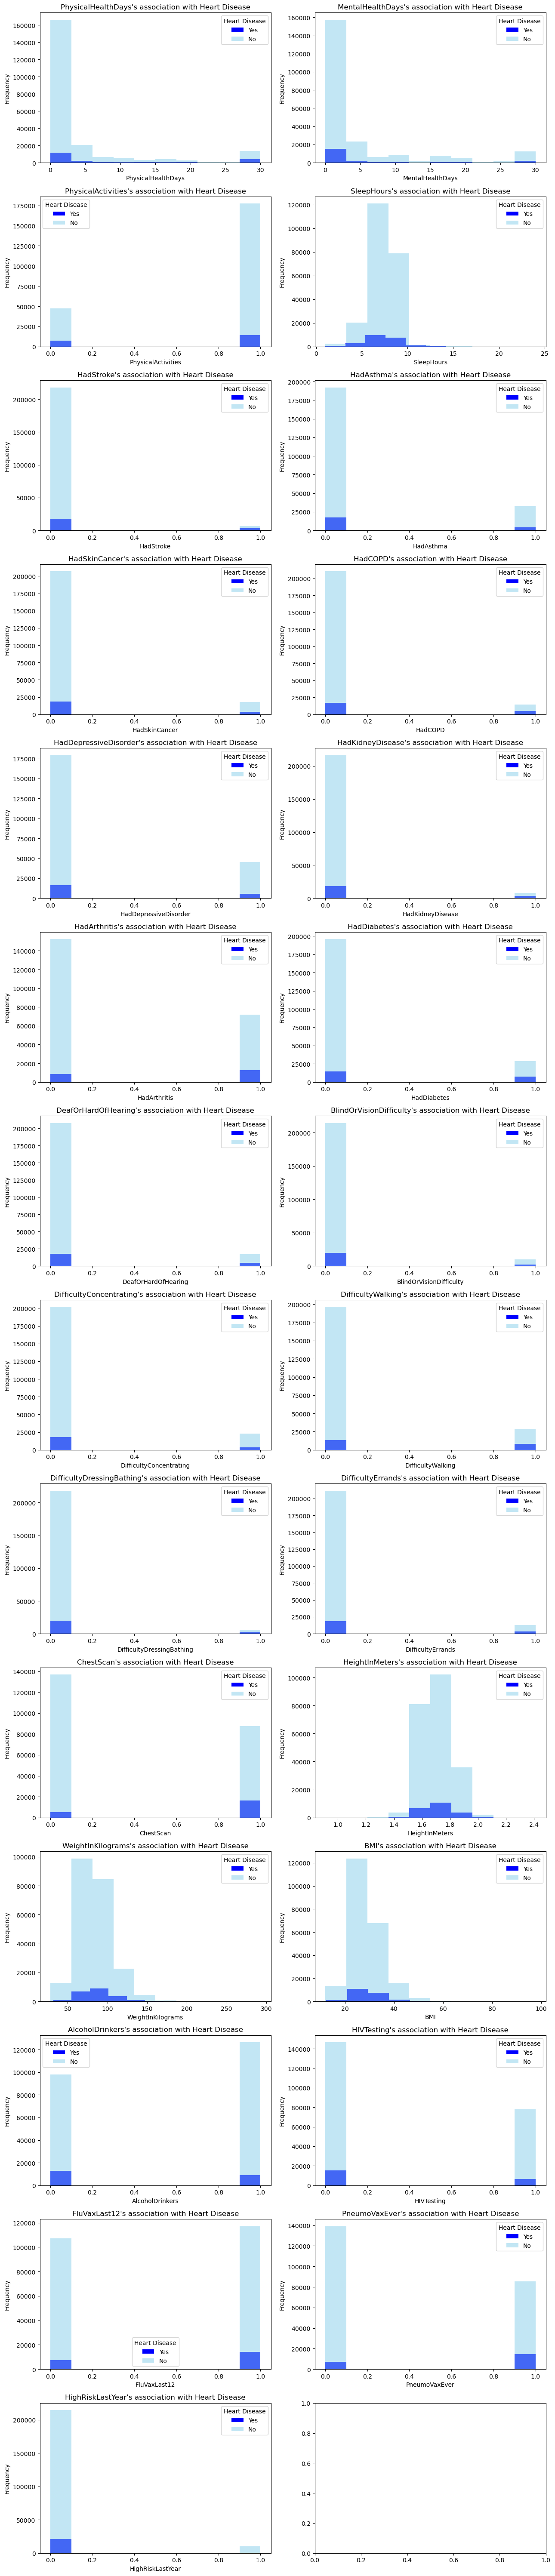

In [9]:
# Plotting out all of the numerical data against the frequency of a patient having heart disease

fig, axes = plt.subplots(nrows=len(num_df.columns) // 2, ncols=2, figsize=(13, 60))

for idx, column in enumerate(num_df.drop(columns='HeartDisease')):
    row_idx = idx // 2
    col_idx = idx % 2
    
    axes[row_idx, col_idx].hist(df[df["HeartDisease"]==1][column], bins=10, alpha=1, color="b", label="Yes")
    axes[row_idx, col_idx].hist(df[df["HeartDisease"]==0][column], bins=10, alpha=0.5, color="skyblue", label="No")
    
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column}'s association with Heart Disease")
    axes[row_idx, col_idx].legend(title='Heart Disease')

plt.tight_layout()
plt.show()

<Axes: >

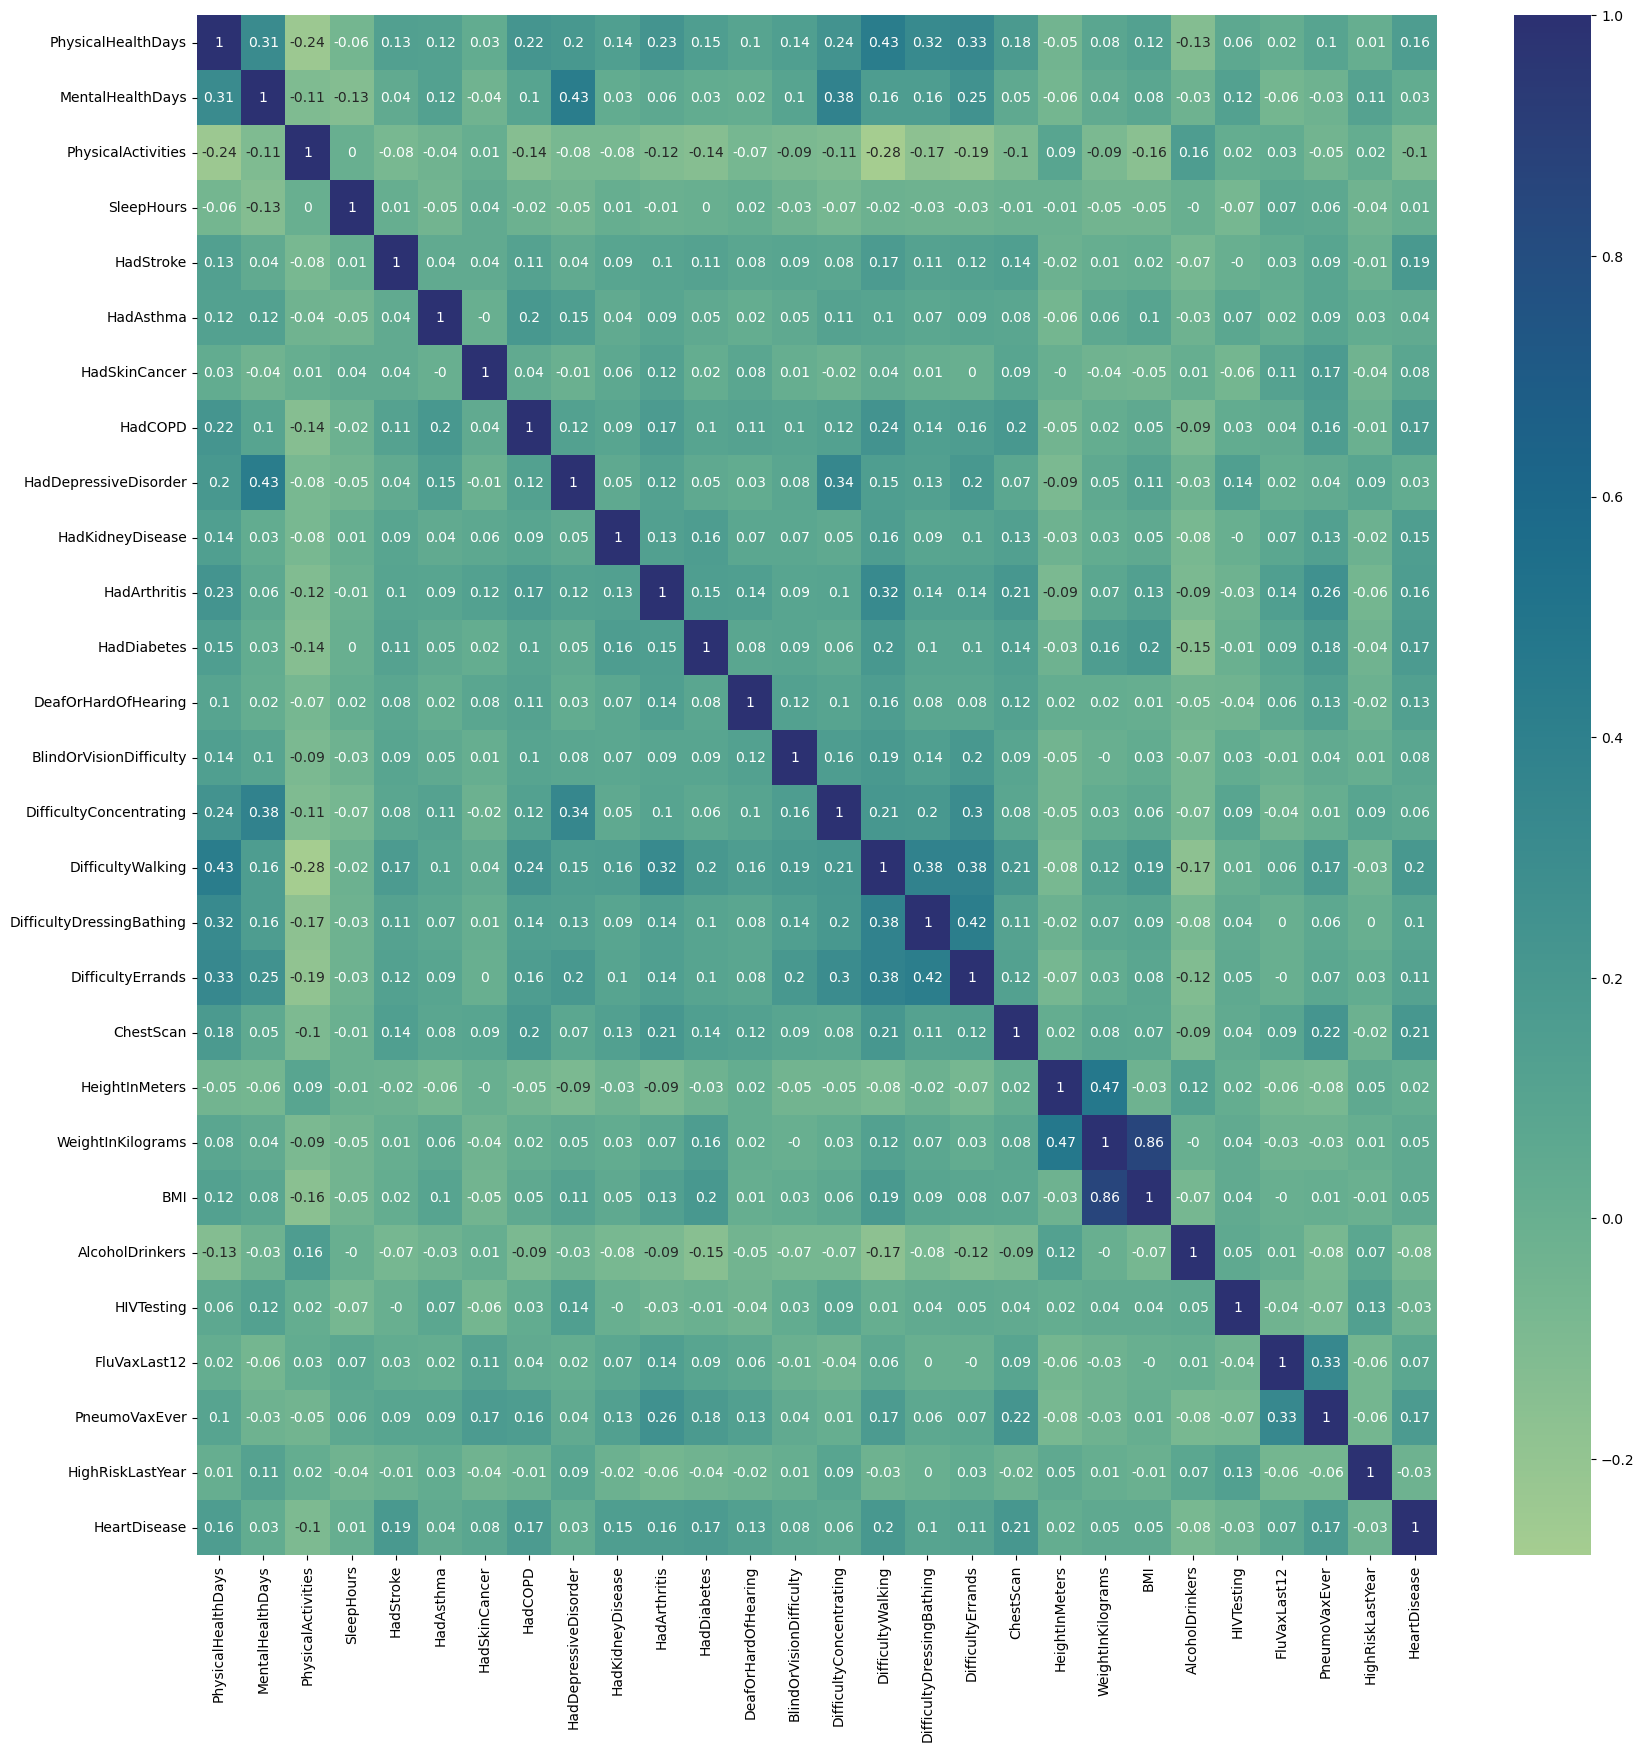

In [10]:
# Checking out the correlation heat map of all the numerical data
correlation = num_df.corr().round(2)
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot = True, cmap="crest")

We will be opting to drop WeightInKilograms due to BMI and WeightInKilograms having a correlation coefficient higher than 70%. We are dropping this because it is less correlated than BMI to the risk of Heart Disease. 

<Axes: >

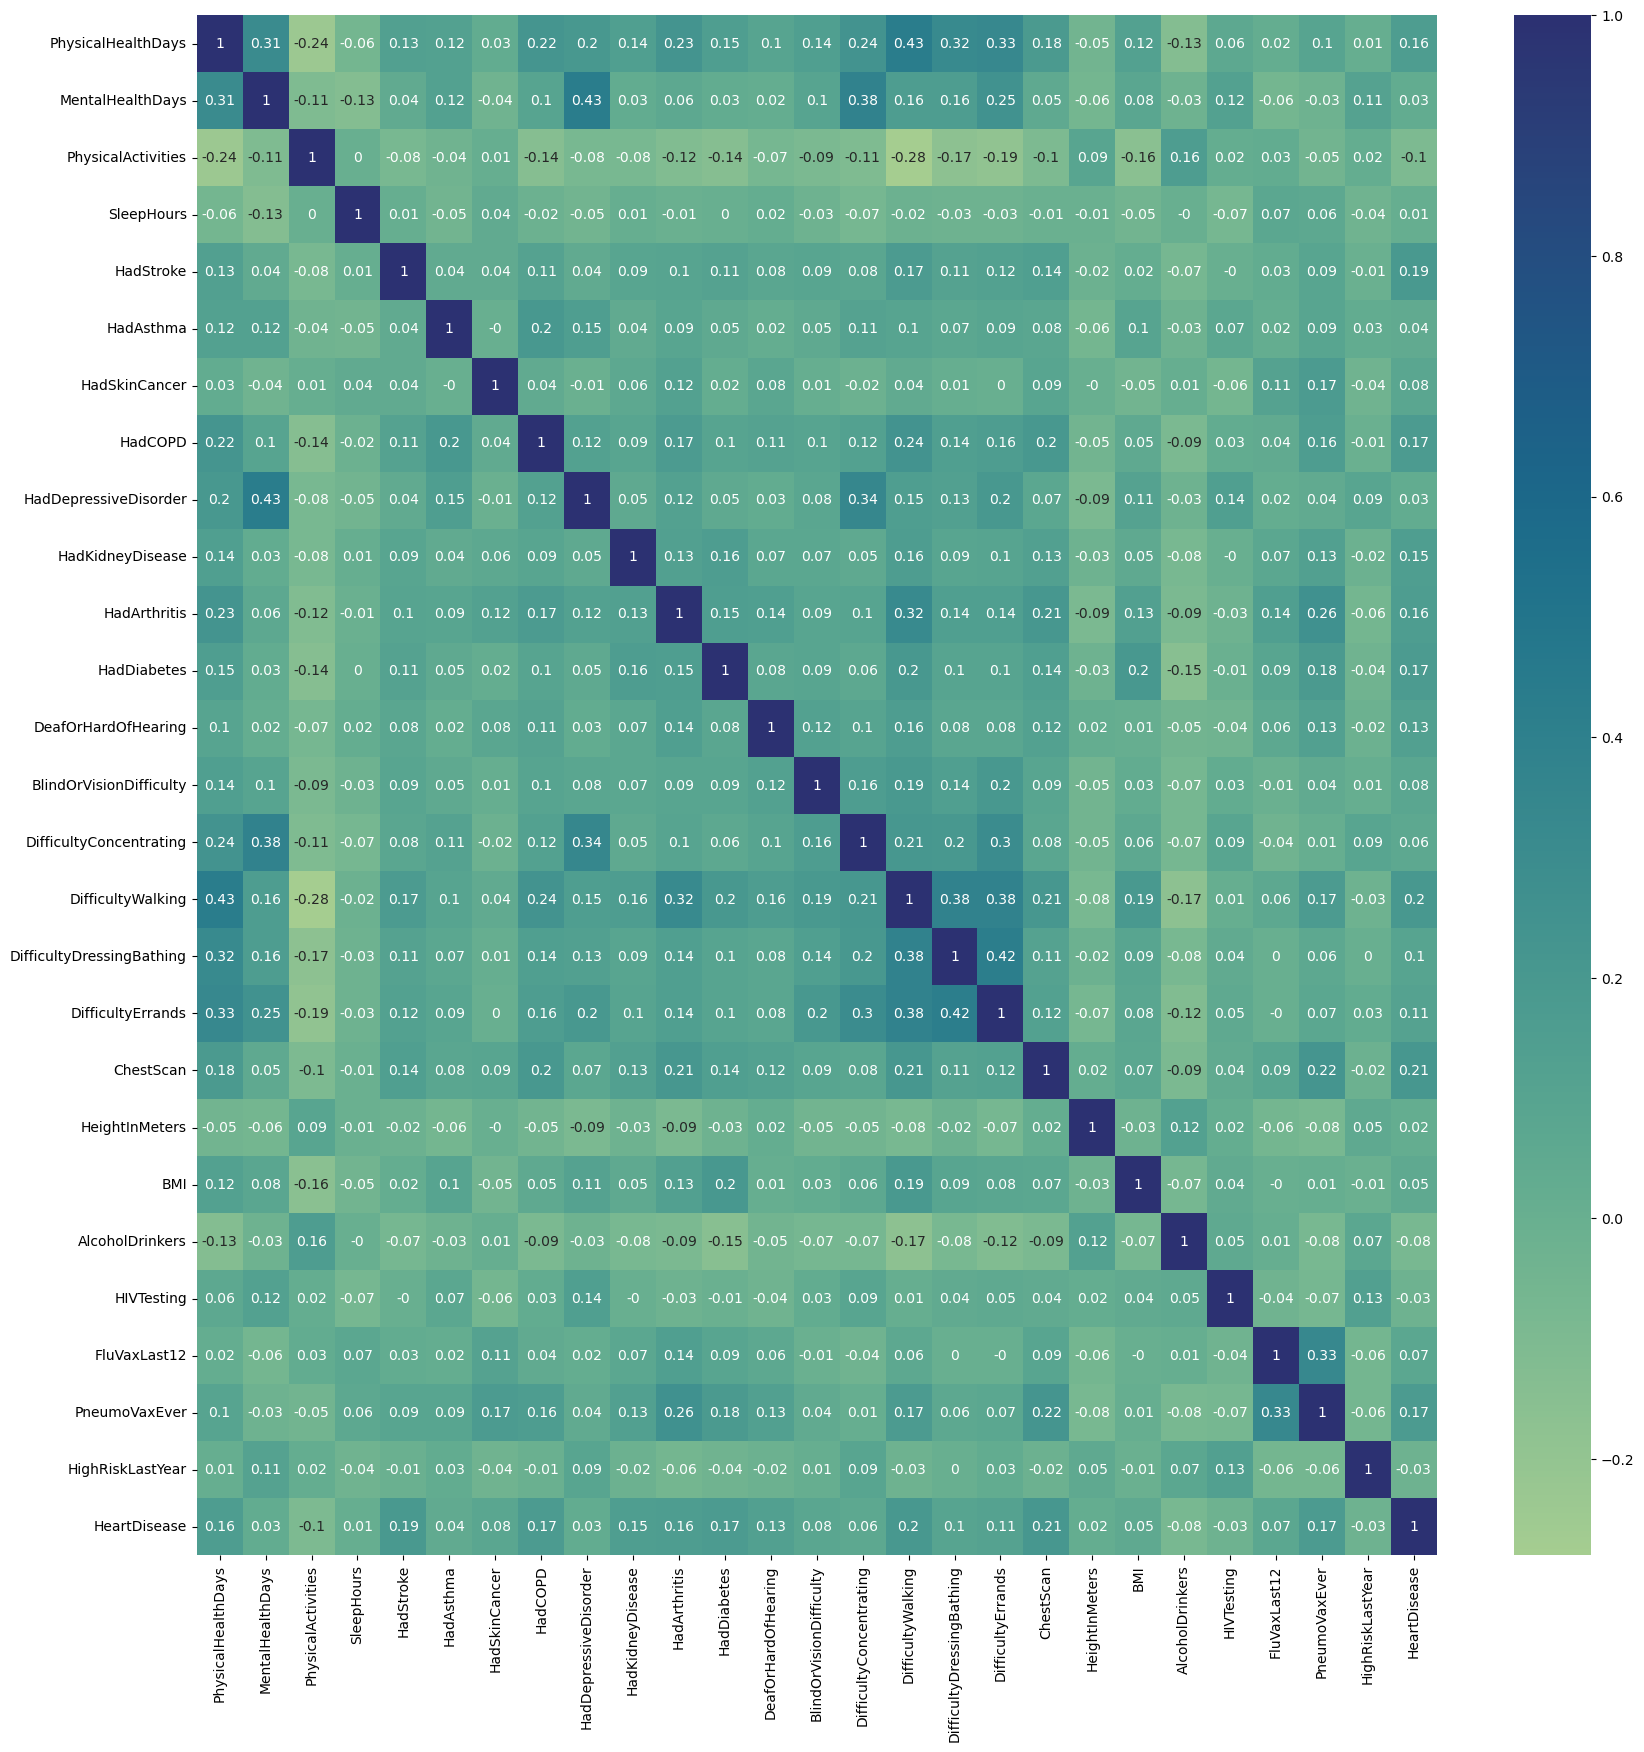

In [11]:
num_df.drop(columns = 'WeightInKilograms', inplace = True)

correlation = num_df.corr().round(2)
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot = True, cmap="crest")

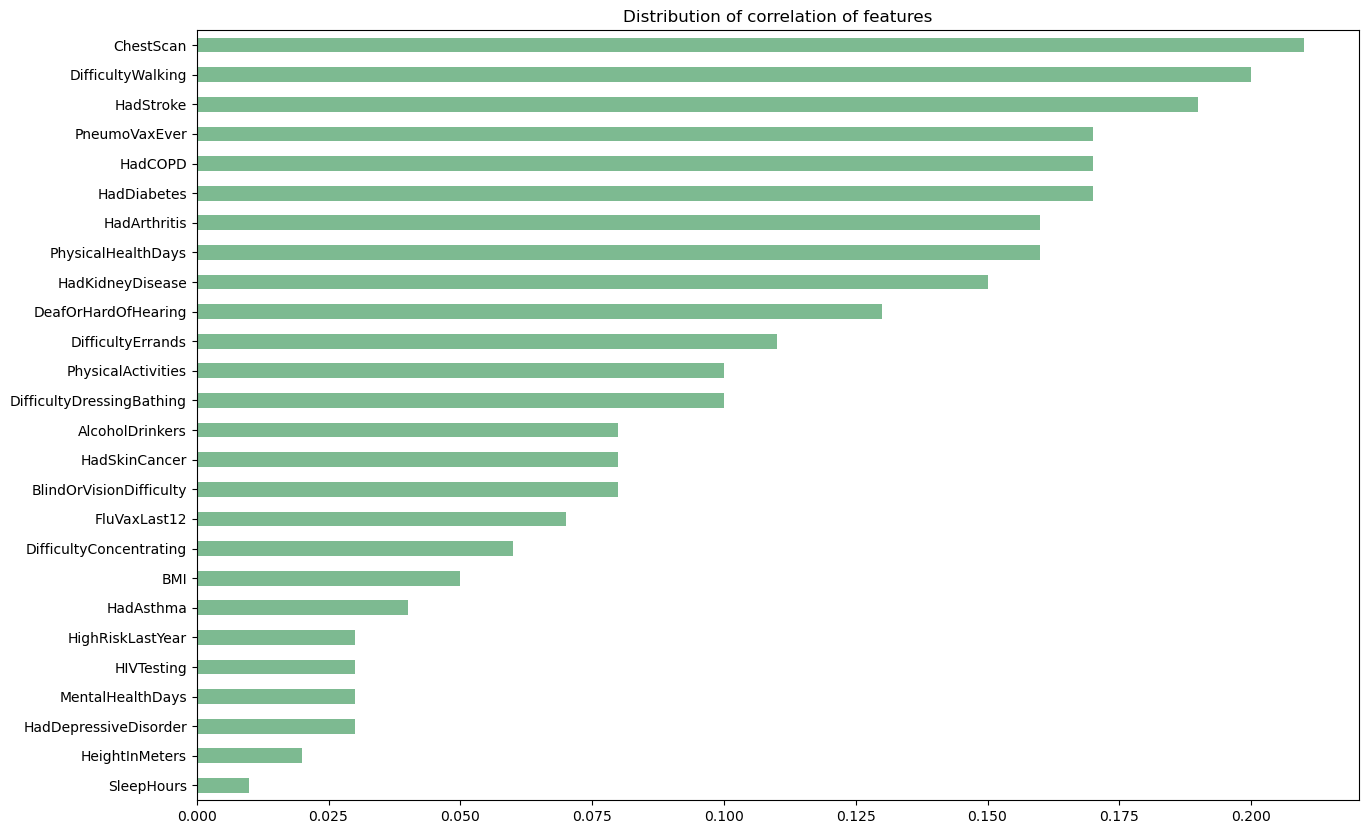

In [12]:
sns.set_palette('crest')
plt.figure(figsize = (15,10))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()